Library, W&B Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# Inisialisasi W&B untuk tracking EDA [cite: 30, 40]
run = wandb.init(project="titanic-eda-2026", name="comprehensive-eda-hybrid")

# Load data langsung dari sumber [cite: 15]
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Log dataset mentah ke W&B Table [cite: 40]
wandb.log({"raw_data": wandb.Table(dataframe=df)})

print("Dataset Loaded Successfully!")
df.head()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:wandb: WARNING Invalid choice
wandb: Enter your choice:wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Create a new API key at: https://wandb.ai/authorize?ref=models
wandb: Store your API key securely and do not share it.
wandb: Paste your API key and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nunu05867 (nunu05867-stikomelrahma) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Dataset Loaded Successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Inspeksi Mendalam (Mengenal Masalah)

In [2]:
# Cek info umum dan statistik deskriptif [cite: 15]
print("--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

Data Cleaning (Sanitasi Data)

In [3]:
# 1. Imputasi Age dengan Median [cite: 16]
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Imputasi Embarked dengan Modus [cite: 16]
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop Cabin karena >70% kosong [cite: 16]
df.drop(columns=['Cabin'], inplace=True)

print("Cleaning Selesai. Sisa data kosong:", df.isnull().sum().sum())

Cleaning Selesai. Sisa data kosong: 0


Exploratory Data Analysis (Visualisasi Hybrid)

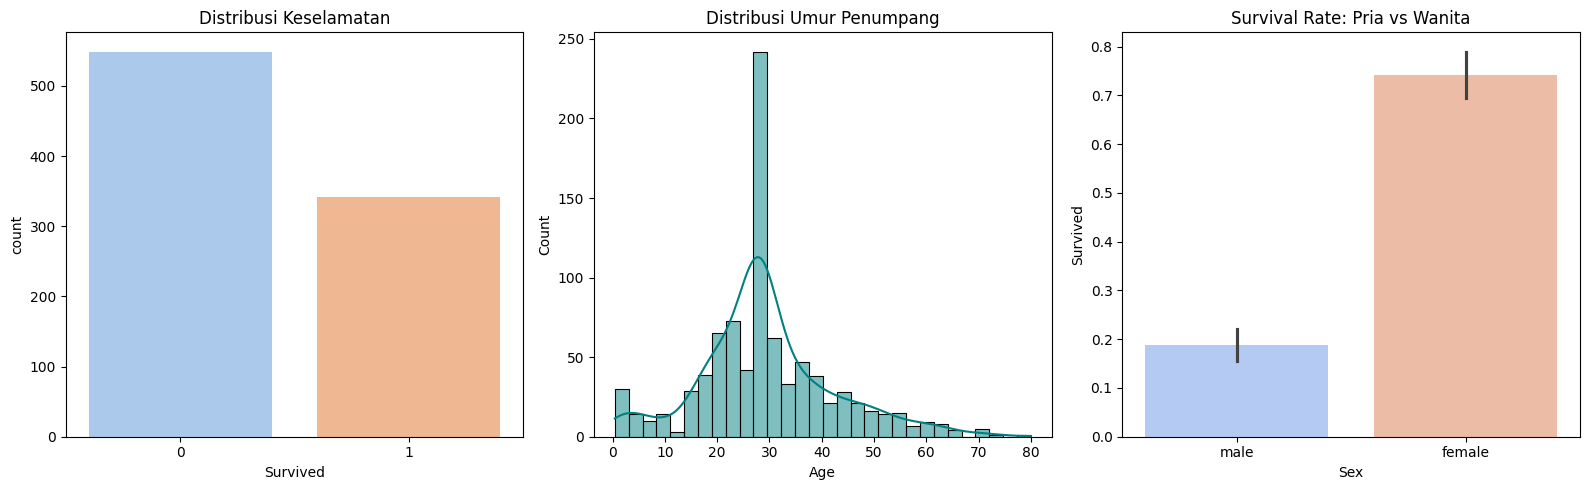

In [4]:
plt.figure(figsize=(16, 5))

# Plot 1: Distribusi Selamat [cite: 17]
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Survived', hue='Survived', palette='pastel', legend=False)
plt.title("Distribusi Keselamatan")

# Plot 2: Distribusi Umur [cite: 17]
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], kde=True, color='teal')
plt.title("Distribusi Umur Penumpang")

# Plot 3: Survival Rate by Gender (Warning-Free)
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Sex', y='Survived', hue='Sex', palette='coolwarm', legend=False)
plt.title("Survival Rate: Pria vs Wanita")

plt.tight_layout()
plt.show()

Feature Engineering (Persiapan ML)

In [5]:
# 1. Membuat fitur FamilySize (Sesuai tugas)
# Formula: FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Encoding: Mengubah Teks menjadi Angka
# Sex: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Embarked: Categorical Encoding
df['Embarked'] = df['Embarked'].astype('category').cat.codes

print("Feature Engineering Selesai. Data sekarang bersifat numerik.")
df.head()

Feature Engineering Selesai. Data sekarang bersifat numerik.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,1


Analisis Korelasi & Final Logging

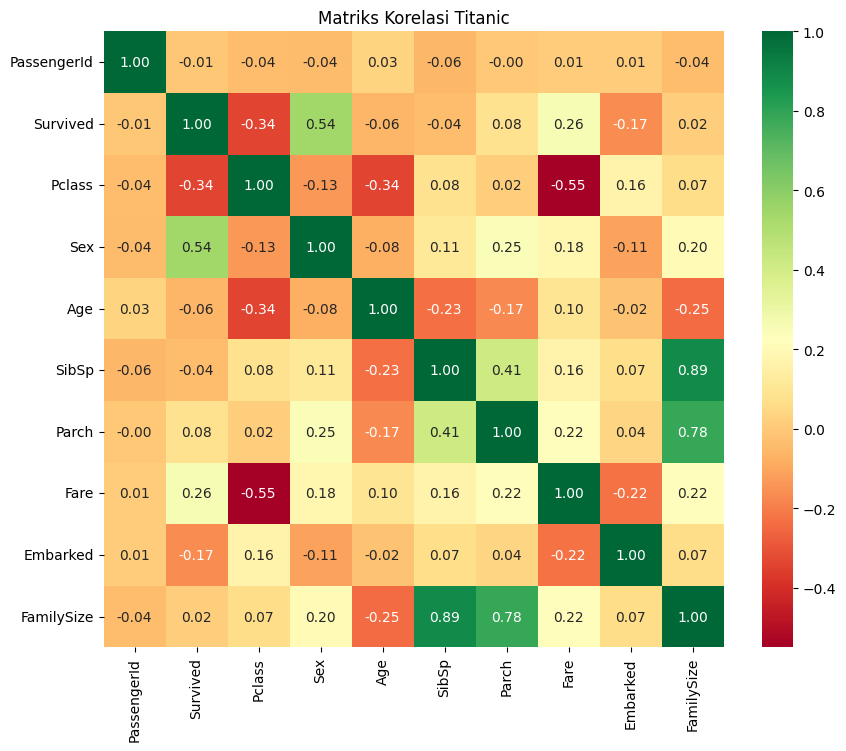

final_features_count,12


In [6]:
# Heatmap Korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Matriks Korelasi Titanic")
plt.show()

# Log data akhir yang sudah bersih dan ter-encode ke W&B [cite: 41]
clean_table = wandb.Table(dataframe=df)
wandb.log({"final_processed_data": clean_table})

# Ringkasan akhir di dashboard
wandb.run.summary["final_features_count"] = df.shape[1]
wandb.finish()